In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
swiss_df = pd.read_csv('../Swiss2_0902_2302.csv',sep = ',',decimal = '.')
n_nodes = swiss_df['Year'].size

In [3]:
swiss_df['EventCode'].unique()

array([  42,   20,   40,   46,   51,  100,   36,   43,  112,   31,  130,
         57,   10,   50,   60,  120,   80,  110,  842,   37,   12,  164,
        874,   84,  173,  231,   61,   14,   41,  190,  356,   90,   30,
        193,  172,  111,  841,  128,  114,   75,   18,   70,   33,   64,
        233,   71,   13,  161,  181,  831,  160,  113,   16,   11,  192,
        833,  353,  243,   44,  134,  154, 1822,  311,  163,  180,   22,
       1123,  106,  101,  125,  124,  141,   39, 1056,  170,   45,   27,
        139,  871,   26,  873,   55,   73, 1711,  213,  174, 1124,  127,
         62,  138,  214, 1712,   53,   85,   17,  241,  182, 1241,  151])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1095d3390>]],
      dtype=object)

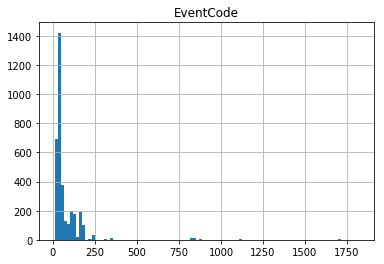

In [4]:
nb_bins = swiss_df['EventCode'].unique().size
swiss_df.hist(bins=nb_bins, column='EventCode')

In [5]:
# Plot nodes according to day and event code

eventCode = swiss_df['EventCode']
day = swiss_df['SQLDATE'] % 100

day_range = np.max(day) - np.min(day) + 1
day_vector = np.arange(np.min(day), np.max(day) + 1)
#plt.plot(day, eventCode)

eventMat = np.zeros((eventCode.size, day_range))
eventMat.shape

for event, day in zip(eventCode, day):
    eventMat[event][day - 9] += 1
    
    
eventMat[300]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
print(np.sum(eventMat, axis=1))
event_length = eventMat.shape[0]

code_df = pd.DataFrame()
frequency_df = pd.DataFrame()
#df = df.append({'name': 'Zed', 'age': 9, 'height': 2}, ignore_index=True)

for i in range(0, event_length):
    if np.sum(eventMat, axis=1)[i] > 20:
        frequency_df = frequency_df.append({'frequency': eventMat[i]}, ignore_index=True)
        code_df = code_df.append({'eventCode': i}, ignore_index=True)
        
frequency_df = pd.DataFrame(frequency_df['frequency'].values.tolist())
code_df = pd.concat([code_df.reset_index(drop=True), frequency_df.reset_index(drop=True)], axis=1)
code_df = code_df.set_index('eventCode')
code_df.columns=['9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
                '20', '21', '22', '23']

[0. 0. 0. ... 0. 0. 0.]


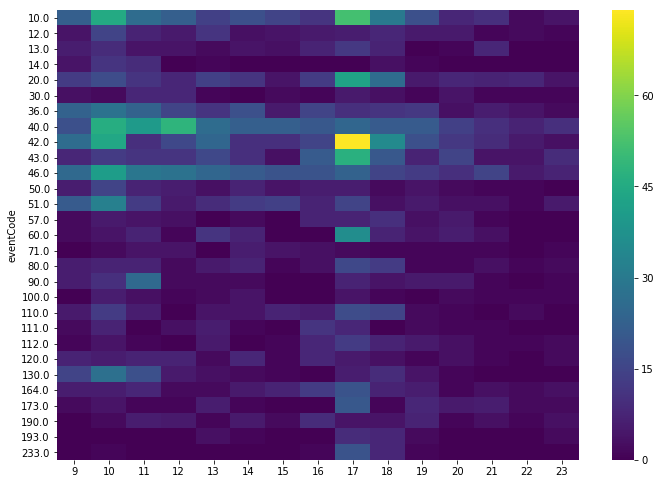

In [44]:
# Plot the number of occurences of each event code for each day

#plt.imshow(eventMat[0:30], cmap='hot', interpolation='nearest')
#plt.show()
import seaborn as sns

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.heatmap(code_df, annot=False, fmt="g", cmap='viridis', ax=ax)
plt.show()

In [5]:
# Adjacency matrix: two nodes are connected if their CAMEO EventCode is identical

swiss_adj = np.zeros((n_nodes, n_nodes))
swiss_adj.shape

for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if (swiss_df['EventCode'][i] == swiss_df['EventCode'][j]):
            swiss_adj[i][j] = 1
            swiss_adj[j][i] = 1
        
        

KeyboardInterrupt: 

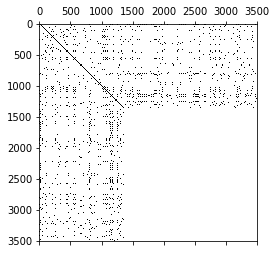

In [6]:
plt.spy(swiss_adj)